# 🟨 FASE 2: ANÁLISIS EXPLORATORIO (EDA)
**Notebook:** `02_eda_servicios.ipynb`  
**Objetivo:** Comprender los datos y extraer patrones significativos que faciliten la toma de decisiones estratégicas en los servicios públicos de Barranquilla.

---

## ✅ Acciones realizadas en este notebook:

- 📅 **Tendencias temporales** de reclamos por mes y año
- 📌 **Causas más frecuentes** por servicio público (acueducto, energía, aseo, gas, etc.)
- 🏢 **Comparación entre empresas prestadoras** por número de reclamos y atención
- 🏙️ **Ranking de municipios** con mayor número de reclamos acumulados
- ⏱️ **Tiempos promedio de atención** por empresa o municipio

---

## 🛠️ Resultado esperado

Este análisis permitirá:

- Detectar **problemas operativos frecuentes**
- Priorizar recursos y mejorar la **atención al usuario**
- Visualizar patrones geográficos y temporales
- Definir **indicadores clave (KPIs)** para el tablero en Power BI


## **Conexiones iniciales**

In [32]:
# -----------------------------
# ✅ 1. Importar librerías necesarias
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración de pandas para visualizar mejor
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# -----------------------------
# 📁 2. Definir rutas del proyecto
# -----------------------------
from google.colab import drive
drive.mount('/content/drive')

# Ruta base del proyecto
base_path = '/content/drive/MyDrive/00_Data_ISES'
clean_path = os.path.join(base_path, '01_data_clean')

# -----------------------------
# 📄 3. Cargar archivos limpios
# -----------------------------
df_aseo = pd.read_csv(os.path.join(clean_path, 'reclamaciones_aseo_limpio.csv'))
df_energia = pd.read_csv(os.path.join(clean_path, 'reclamaciones_energia_limpio.csv'))
df_acueducto = pd.read_csv(os.path.join(clean_path, 'reclamaciones_acueducto_limpio.csv'))
df_alcantarillado = pd.read_csv(os.path.join(clean_path, 'reclamaciones_alcantarillado_limpio.csv'))
df_gas = pd.read_csv(os.path.join(clean_path, 'reclamaciones_gas_limpio.csv'))

# Verificar carga
print("✅ Archivos cargados:")
print(f"Aseo: {df_aseo.shape}")
print(f"Energía: {df_energia.shape}")
print(f"Acueducto: {df_acueducto.shape}")
print(f"Alcantarillado: {df_alcantarillado.shape}")
print(f"Gas: {df_gas.shape}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Archivos cargados:
Aseo: (3670, 6)
Energía: (6540, 6)
Acueducto: (5855, 6)
Alcantarillado: (3900, 6)
Gas: (3075, 6)


## **📊 Análisis 1: Tendencias de Reclamos por Mes/Año**

---



 1. Etiquetar servicio en cada dataset

In [33]:

df_aseo['SERVICIO'] = 'ASEO'
df_energia['SERVICIO'] = 'ENERGIA'
df_acueducto['SERVICIO'] = 'ACUEDUCTO'
df_alcantarillado['SERVICIO'] = 'ALCANTARILLADO'
df_gas['SERVICIO'] = 'GAS'


 2. Unir todos los reclamos en un solo DataFrame

In [34]:
df_reclamos = pd.concat([
    df_aseo,
    df_energia,
    df_acueducto,
    df_alcantarillado,
    df_gas
], ignore_index=True)


 3. Agrupar y graficar por año y servicio

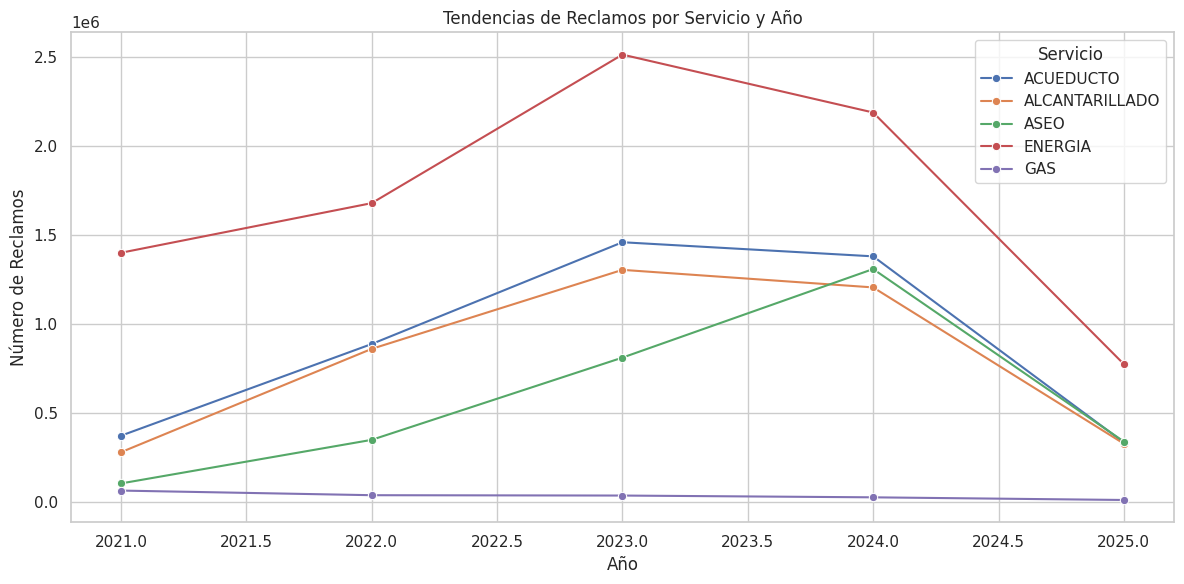

In [35]:
# Agrupar total de reclamos por año y servicio
reclamos_anuales = df_reclamos.groupby(['Año', 'SERVICIO'])['Número de Reclamos'].sum().reset_index()

# Visualizar
plt.figure(figsize=(12, 6))
sns.lineplot(data=reclamos_anuales, x='Año', y='Número de Reclamos', hue='SERVICIO', marker='o')
plt.title('Tendencias de Reclamos por Servicio y Año')
plt.ylabel('Número de Reclamos')
plt.xlabel('Año')
plt.grid(True)
plt.legend(title='Servicio')
plt.tight_layout()
plt.show()


*Exportar tabla de reclamos por año y servicio*

In [36]:
# Agrupar total de reclamos por año y servicio (si no lo has hecho)
reclamos_anuales = df_reclamos.groupby(['Año', 'SERVICIO'])['Número de Reclamos'].sum().reset_index()

# Exportar a CSV para Power BI
reclamos_anuales.to_csv(os.path.join(clean_path, 'reclamos_por_anio_y_servicio.csv'), index=False)

print("✅ Tabla de reclamos por año y servicio exportada correctamente.")


✅ Tabla de reclamos por año y servicio exportada correctamente.


# **📊 Análisis 2: Causas más frecuentes por servicio**

*Objetivo:*

*   Identificar las principales causas de reclamos por cada servicio.
*   Detectar si hay causas repetitivas que afectan múltiples servicios.
*   Visualizar la distribución de causas para análisis estratégico y seguimiento.


1. Agrupar datos por TIPO DE TRÁMITE o DETALLE

In [49]:
print(df_reclamos.columns)


Index(['MUNICIPIO', 'TIPO DE TRÁMITE', 'DETALLE', 'Año', 'Número de Reclamos',
       'Fecha', 'SERVICIO'],
      dtype='object')


Normalmente se llaman:

'TIPO DE TRÁMITE' → categoría general

'DETALLE' → causa específica del reclamo



2. Agrupar por causa más frecuente (por servicio)

In [38]:

# Agrupar por servicio y causa
causas_top = df_reclamos.groupby(['SERVICIO', 'DETALLE'])['Número de Reclamos'].sum().reset_index()

# Ordenar dentro de cada servicio
causas_top = causas_top.sort_values(['SERVICIO', 'Número de Reclamos'], ascending=[True, False])

# Opcional: obtener el top 5 de causas por servicio
causas_top5 = causas_top.groupby('SERVICIO').head(5).reset_index(drop=True)


3. Visualizar causas más frecuentes por servicio

/tmp/ipython-input-39-2658802683.py:14: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


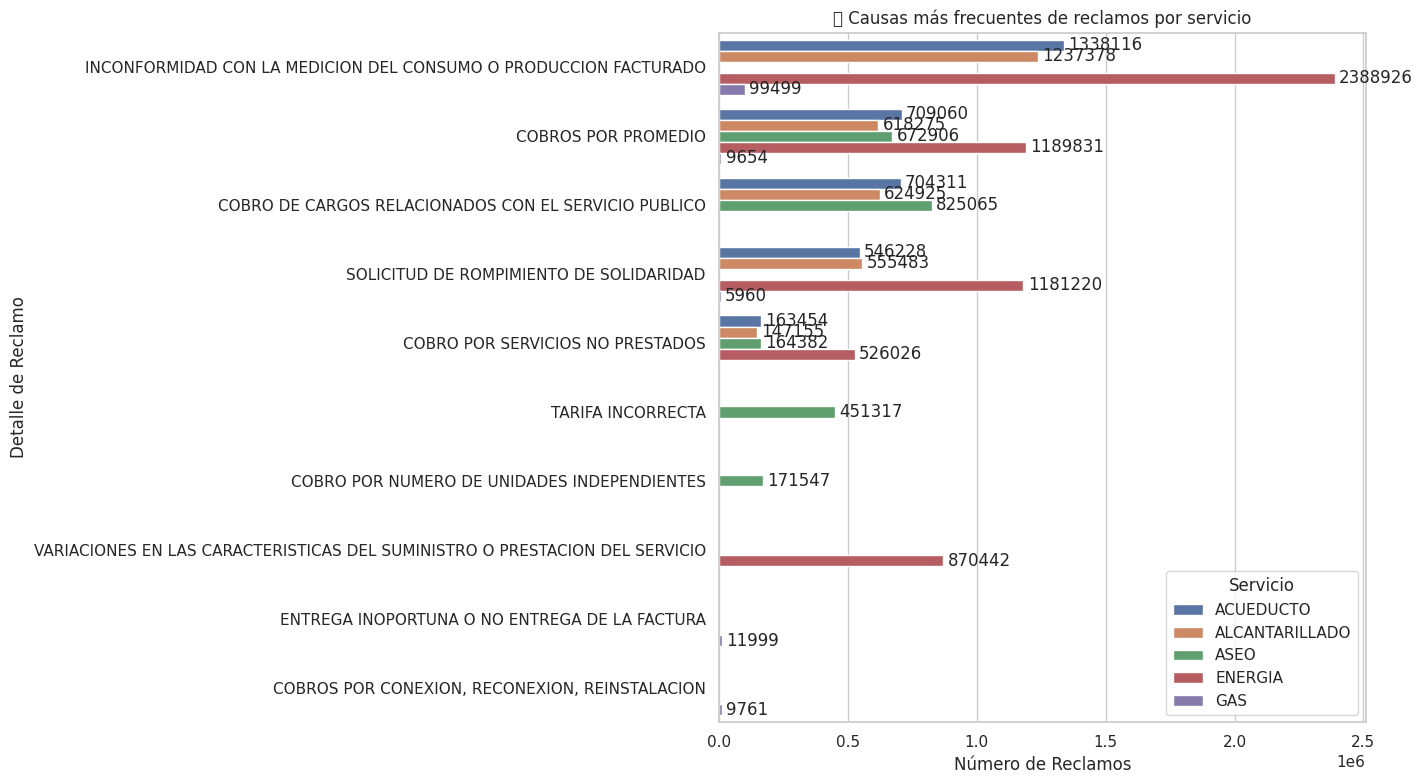

In [39]:
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=causas_top5,
    x='Número de Reclamos',
    y='DETALLE',
    hue='SERVICIO',
    dodge=True
)

plt.title('📌 Causas más frecuentes de reclamos por servicio')
plt.xlabel('Número de Reclamos')
plt.ylabel('Detalle de Reclamo')
plt.legend(title='Servicio')
plt.tight_layout()

# Agregar etiquetas sobre las barras
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.show()



 4. Exportar tabla para Power BI

In [40]:
# Guardar tabla completa de causas por servicio
causas_top.to_csv(os.path.join(clean_path, 'reclamos_por_causa_y_servicio.csv'), index=False)

# Guardar solo el top 5 si lo deseas también
causas_top5.to_csv(os.path.join(clean_path, 'reclamos_top5_causas_por_servicio.csv'), index=False)


#**📊 Análisis 3: Tendencias de Reclamos por Mes/Año**


*Objetivo:*

* Identificar los municipios más afectados por reclamos
*  Visualizar la carga de reclamos territorialmente.






**Filtrar solo reclamos del año 2024**

In [41]:
# Filtrar reclamos del año 2024
df_reclamos_2024 = df_reclamos[df_reclamos['Año'] == 2024].copy()

 1. Agrupar por MUNICIPIO y SERVICIO

In [42]:
reclamos_municipio_2024 = df_reclamos_2024.groupby(['MUNICIPIO', 'SERVICIO'])['Número de Reclamos'].sum().reset_index()
top_municipios_2024 = reclamos_municipio_2024.sort_values(['SERVICIO', 'Número de Reclamos'], ascending=[True, False])
top_municipios_2024 = top_municipios_2024.groupby('SERVICIO').head(5).reset_index(drop=True)


 2. Visualizar

/tmp/ipython-input-48-3699246567.py:13: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


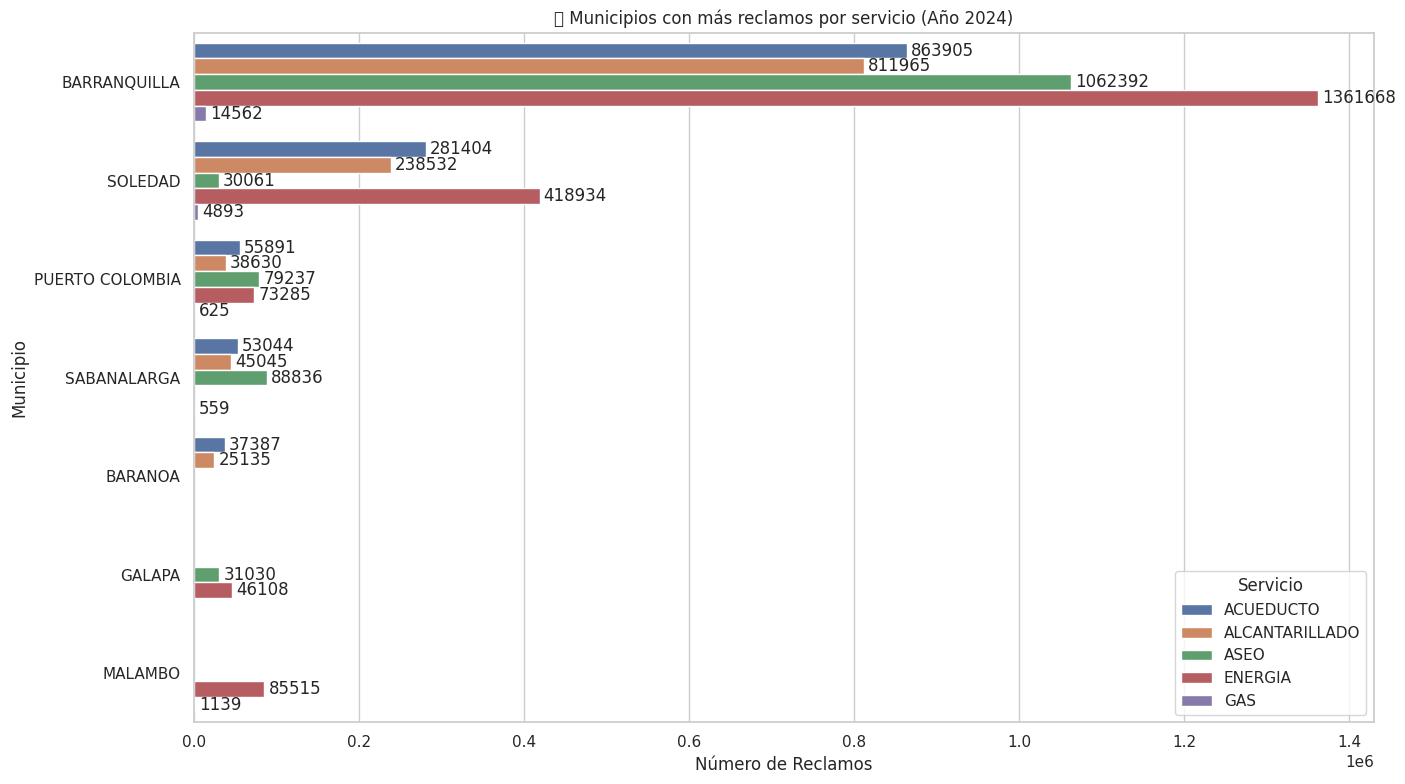

In [48]:
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=top_municipios_2024,
    x='Número de Reclamos',
    y='MUNICIPIO',
    hue='SERVICIO',
    dodge=True
)
plt.title('Municipios con más reclamos por servicio (Año 2024)')
plt.xlabel('Número de Reclamos')
plt.ylabel('Municipio')
plt.legend(title='Servicio')
plt.tight_layout()

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.show()

3. Exportar a CSV

In [50]:
# Guardar tabla completa
reclamos_por_municipio.to_csv(os.path.join(clean_path, 'reclamos_por_municipio_y_servicio.csv'), index=False)

# Guardar top 5
top_municipios.to_csv(os.path.join(clean_path, 'reclamos_top5_municipios_por_servicio.csv'), index=False)
